# Clustering for Customer Segmentation

<b>Dataset:</b> <i>Mall_Customers.csv</i><br>
<a href="https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation/data">Description</a>

**Attribute Information:**<br>

* CustomerID - Unique ID assigned to the customer 
* Gender - Gender of the customer
* Age - Age of the customer
* Annual Income - (k$) Annual Income of the customer
* Spending Score - (1-100) Score assigned by the mall based on customer behavior and spending nature<br>

# Clustering Algorithms

*insert explanation on clustering*

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

## Load and Explore the Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

### Quick inspection of data

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income,Spending Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


### Identify actionable features to to define customer segments / clusters

In [5]:
X = df[['Annual Income','Spending Score']] #Use only Income & Spending for this use case, slicing based on column name

In [6]:
X.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Remove outliers if any and normalize as needed

Text(0.5,0,'Income / Spend')

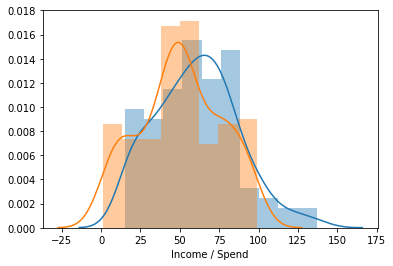

In [7]:
#Visualizing the data - displot
plot_income = sns.distplot(df["Annual Income"])
plot_spend = sns.distplot(df["Spending Score"])
plt.xlabel('Income / Spend')

#### _No extreme outliers and data is normalized/scaled already_

## Identify clusters via K-Means

In [8]:
from sklearn.cluster import KMeans

### Use Elbow Method to Determine Optimal K

#### _Compute the Sum of Squared Errors (sse) for k = 1 to k = 11_

In [9]:
sse = []


for i in range(1,11):
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

Text(0,0.5,'sse')

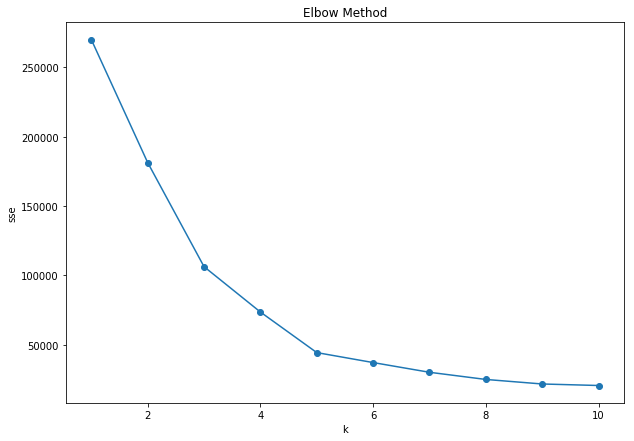

In [10]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("sse")

#### _Which k do we use?_
Let's try with k = 5

In [11]:
##Fitting kmeans to the dataset with k=5
km=KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)

In [12]:
## Add the labels to the original dataframe
df_res = df.copy()
df_res['Label'] = y_means

In [14]:
df_res.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Visualize the Clusters

<a href="https://seaborn.pydata.org/tutorial/color_palettes.html">Seaborn Color Palettes</a>

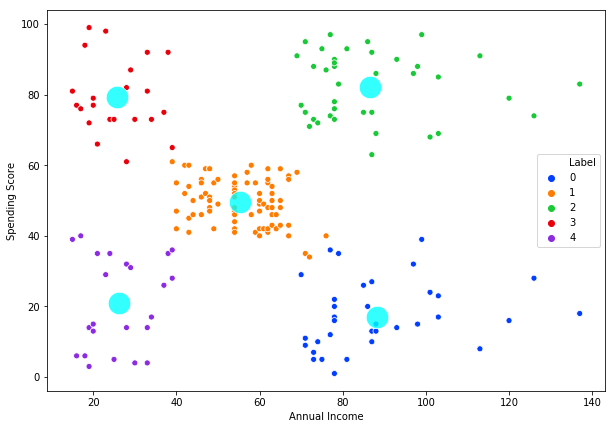

In [16]:
#Visualizing the clusters for k=5

#Set a color palette
bright_colors = sns.color_palette("bright", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_res['Annual Income'], y=df_res['Spending Score'], hue=df_res.Label, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

## Insights on the Clusters